Leitura dos dados no documento excel `Acoustic_Extinguisher_Fire_Dataset.xlsx`.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


Relação entre os dados: `DISTANCE`, `SIZE` e `AIRFLOW`

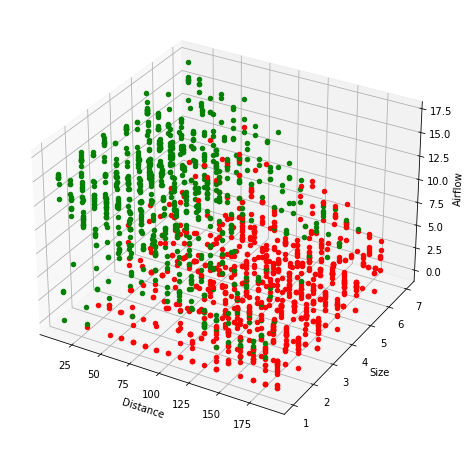

In [3]:
import matplotlib.pyplot as plt

samples = df.sample(frac=0.1, replace=True)
colors = ['red', 'green']

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(projection='3d')

for index, row in samples.iterrows():
    ax.scatter(row['DISTANCE'], row['SIZE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])

ax.set_xlabel('Distance')
ax.set_ylabel('Size')
ax.set_zlabel('Airflow')

plt.show()

Relação entre os dados da onda: `DESIBEL`, `FREQUENCY` e `AIRFLOW`

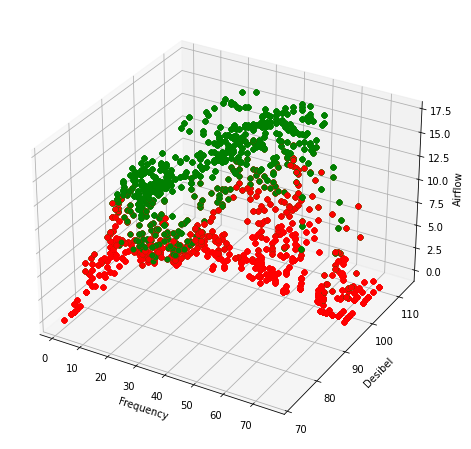

In [4]:
mode = df['DISTANCE'].mode()

df_fixed_distance = df[df['DISTANCE'].isin(mode)]

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(projection='3d')

for index, row in df_fixed_distance.iterrows():
    ax.scatter(row['FREQUENCY'], row['DESIBEL'], row['AIRFLOW'], c=colors[df['STATUS'][index]])

ax.set_xlabel('Frequency')
ax.set_ylabel('Desibel')
ax.set_zlabel('Airflow')

plt.show()

Análise dos dados: Comparação entre os tipos de combustível em relação a distância e fluxo de ar

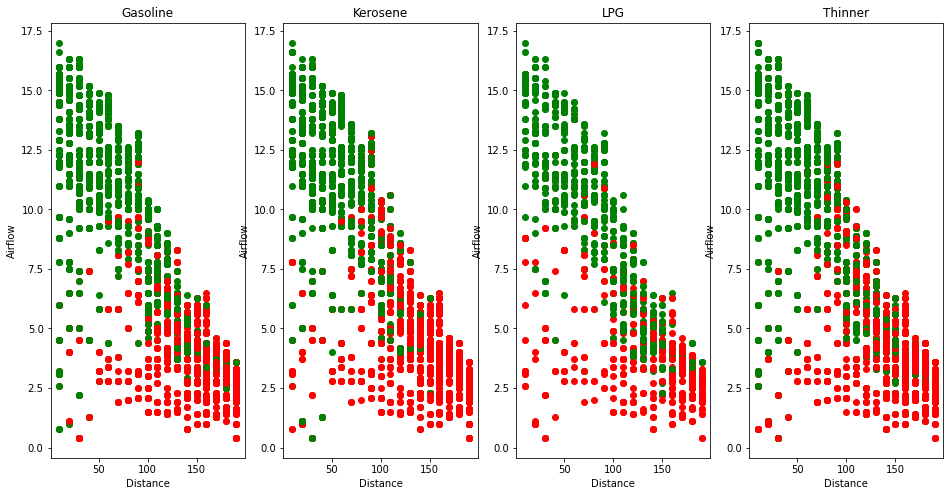

In [5]:
dummy_vars = pd.get_dummies(df['FUEL'])
df_dummies = pd.concat([dummy_vars, df.drop('FUEL', axis=1)], axis = 1, sort=False)

df_dummies = df_dummies.loc[df_dummies['AIRFLOW'] != 0]
percent = 0.8

samples_gasoline = df_dummies.loc[df_dummies['gasoline'] == 1,:].sample(frac=percent, replace=True)
samples_kerosene = df_dummies.loc[df_dummies['kerosene'] == 1,:].sample(frac=percent, replace=True)
samples_lpg = df_dummies.loc[df_dummies['lpg'] == 1,:].sample(frac=percent, replace=True)
samples_thinner = df_dummies.loc[df_dummies['thinner'] == 1,:].sample(frac=percent, replace=True)

plt.figure(figsize=(16, 8))
colors = ['red','green']

plt.subplot(1, 4, 1)
plt.title("Gasoline")
for index, row in samples_gasoline.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 2)
plt.title("Kerosene")
for index, row in samples_kerosene.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 3)
plt.title("LPG")
for index, row in samples_lpg.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 4)
plt.title("Thinner")
for index, row in samples_thinner.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.show()

Detecção e remoção dos outliers no atributo **`AIRFLOW`** pela distribuição dos dados.

In [6]:
desvp = df['AIRFLOW'].std()
media = df['AIRFLOW'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_airflow = df[(df['AIRFLOW'] < media-(desvp*2)) | (df['AIRFLOW'] > media+(desvp*2))]
print("Outliers:", len(df_out_airflow))

# apenas inliers segundo std
df_in_airflow = df[(df['AIRFLOW'] >= media-(desvp*2)) & (df['AIRFLOW'] <= media+(desvp*2))]
print("Inliers:", len(df_in_airflow))

#removendo outliers
df = df_in_airflow

media = 6.98, desvio padrao = 4.74
Outliers: 34
Inliers: 17408


Detecção e remoção dos outliers no atributo **`DESIBEL`** pela distribuição dos dados.

In [7]:
desvp = df['DESIBEL'].std()
media = df['DESIBEL'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_desibel = df[(df['DESIBEL'] < media-(desvp*2)) | (df['DESIBEL'] > media+(desvp*2))]
print("Outliers:", len(df_out_desibel))

# apenas inliers segundo std
df_in_desibel = df[(df['DESIBEL'] >= media-(desvp*2)) & (df['DESIBEL'] <= media+(desvp*2))]
print("Inliers:", len(df_in_desibel))

#removendo outliers
df = df_in_desibel

media = 96.35, desvio padrao = 8.15
Outliers: 595
Inliers: 16813


Verificação de dados faltando em todas as colunas.

In [8]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Verficação de dados nulos em todas as colunas

In [9]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Dados após o tratamento de outliers.

In [10]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17434,7,lpg,190,91,1.9,8,0
17435,7,lpg,190,91,1.6,7,0
17436,7,lpg,190,87,2.5,6,0
17437,7,lpg,190,86,2.2,5,0


Convertemos os atributos categóricos **FUEL** em numéricos usando a técnica one-hot encoding através do método `get_dummies` no `pandas`.

Como resultado, os quatro tipos de combustíveis presentes (`gasoline`, `kerosene`, `lpg` e `thinner`) foram separados em 4 atributos com valores 0 ou 1.

In [11]:
dummy_vars = pd.get_dummies(df['FUEL'])
df_dummies = pd.concat([dummy_vars, df.drop('FUEL', axis=1)], axis = 1, sort=False)
df_dummies

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,0,0,1,10,96,0.0,75,0
1,1,0,0,0,1,10,96,0.0,72,1
2,1,0,0,0,1,10,96,2.6,70,1
3,1,0,0,0,1,10,96,3.2,68,1
4,1,0,0,0,1,10,109,4.5,67,1
...,...,...,...,...,...,...,...,...,...,...
17434,0,0,1,0,7,190,91,1.9,8,0
17435,0,0,1,0,7,190,91,1.6,7,0
17436,0,0,1,0,7,190,87,2.5,6,0
17437,0,0,1,0,7,190,86,2.2,5,0


Normalização dos dados.

In [12]:
print("Normalização Min-Max [0,1]")
df_norm = df_dummies
for column in df_norm:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max()-df_norm[column].min())
df_norm

Normalização Min-Max [0,1]


,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892,1.0
...,...,...,...,...,...,...,...,...,...,...
17434,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.116564,0.094595,0.0
17435,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.098160,0.081081,0.0
17436,0.0,0.0,1.0,0.0,1.0,1.0,0.166667,0.153374,0.067568,0.0
17437,0.0,0.0,1.0,0.0,1.0,1.0,0.133333,0.134969,0.054054,0.0


Determinação dos conjuntos de dados

In [13]:
y = df_norm.iloc[:,-1:]
y.head()

,STATUS
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [14]:
X = df_norm.iloc[:,:-1]
X.head()

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892


Separação do conjunto em dados de treino e teste

In [15]:
# porcentagem de separação dos conjuntos teste e treino
percent=0.2 # 20% teste 80% treino

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=percent, random_state=42)

In [16]:
X_train_copy , X_test_copy, y_train_copy, y_test_copy = X_train , X_test, y_train, y_test

Modelo de classificação KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

#Definição do cross-validation:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

#N_VIZINHOS = 1
knn = KNeighborsClassifier(n_neighbors=1)
#CROSS-VALIDATION
crosscore = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 1 K-NN (Cross-Validation): %0.4f +/- %0.4f' % (crosscore.mean(), crosscore.std()))
#HOLDOUT
knn.fit(X_train, np.ravel(y_train))
testePred = knn.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com 1 K-NN (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = knn.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização 1 K-NN: %0.4f' % gen)
print('\n')

#N_VIZINHOS = 3
knn = KNeighborsClassifier(n_neighbors=3)
#CROSS-VALIDATION
crosscore = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 3 K-NN (Cross-Validation): %0.4f +/- %0.4f' % (crosscore.mean(), crosscore.std()))
#HOLDOUT
knn.fit(X_train, np.ravel(y_train))
testePred = knn.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com 3 K-NN (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = knn.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização 3 K-NN: %0.4f' % gen)
print('\n')

#N_VIZINHOS = 5
knn = KNeighborsClassifier(n_neighbors=5)
#CROSS-VALIDATION
crosscore = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 5 K-NN (Cross-Validation): %0.4f +/- %0.4f' % (crosscore.mean(), crosscore.std()))
#HOLDOUT
knn.fit(X_train, np.ravel(y_train))
testePred = knn.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com 5 K-NN (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = knn.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização 5 K-NN: %0.4f' % gen)
print('\n')

#N_VIZINHOS = 7
knn = KNeighborsClassifier(n_neighbors=7)
#CROSS-VALIDATION
crosscore = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 7 K-NN (Cross-Validation): %0.4f +/- %0.4f' % (crosscore.mean(), crosscore.std()))
#HOLDOUT
knn.fit(X_train, np.ravel(y_train))
testePred = knn.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com 7 K-NN (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = knn.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização 7 K-NN: %0.4f' % gen)
print('\n')

#N_VIZINHOS = 11
knn = KNeighborsClassifier(n_neighbors=11)
#CROSS-VALIDATION
crosscore = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 11 K-NN (Cross-Validation): %0.4f +/- %0.4f' % (crosscore.mean(), crosscore.std()))
#HOLDOUT
knn.fit(X_train, np.ravel(y_train))
testePred = knn.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com 11 K-NN (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = knn.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização 11 K-NN: %0.4f' % gen)
print('\n')

Acurácia com 1 K-NN (Cross-Validation): 0.9625 +/- 0.0025
Acurácia com 1 K-NN (Holdout): 0.9658
Generalização 1 K-NN: 0.0342


Acurácia com 3 K-NN (Cross-Validation): 0.9610 +/- 0.0038
Acurácia com 3 K-NN (Holdout): 0.9616
Generalização 3 K-NN: 0.0235


Acurácia com 5 K-NN (Cross-Validation): 0.9610 +/- 0.0015
Acurácia com 5 K-NN (Holdout): 0.9619
Generalização 5 K-NN: 0.0155


Acurácia com 7 K-NN (Cross-Validation): 0.9616 +/- 0.0019
Acurácia com 7 K-NN (Holdout): 0.9649
Generalização 7 K-NN: 0.0090


Acurácia com 11 K-NN (Cross-Validation): 0.9588 +/- 0.0036
Acurácia com 11 K-NN (Holdout): 0.9634
Generalização 11 K-NN: 0.0042




Árvore de Decisão

In [37]:
from sklearn import tree

dct = tree.DecisionTreeClassifier()
#CROSS-VALIDATION
crosscores = cross_val_score(dct, X, y, cv=kf)
print('Acurácia com Gini (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std())) 
#HOLDOUT
dct.fit(X_train, np.ravel(y_train))
testePred = dct.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com Gini (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = dct.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização com Gini: %0.4f' % gen)
print('\n')

dct = tree.DecisionTreeClassifier(criterion='entropy')
#CROSS-VALIDATION
crosscores = cross_val_score(dct, X, y, cv=kf)
print('Acurácia com Entropy (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std())) 
#HOLDOUT
dct.fit(X_train, np.ravel(y_train))
testePred = dct.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com Entropy (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = dct.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização com Entropy : %0.4f' % gen)
print('\n')

dct = tree.DecisionTreeClassifier(max_depth=16)
#CROSS-VALIDATION
crosscores = cross_val_score(dct, X, y, cv=kf)
print('Acurácia com Gini em 16 níveis (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std())) 
#HOLDOUT
dct.fit(X_train, np.ravel(y_train))
testePred = dct.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com Gini em 16 níveis (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = dct.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização com Gini em 16 níveis: %0.4f' % gen)
print('\n')

Acurácia com Gini (Cross-Validation): 0.9651 +/- 0.0020
Acurácia com Gini (Holdout): 0.9673
Generalização com Gini: 0.0327


Acurácia com Entropy (Cross-Validation): 0.9678 +/- 0.0029
Acurácia com Entropy (Holdout): 0.9655
Generalização com Entropy : 0.0345


Acurácia com Gini em 16 níveis (Cross-Validation): 0.9634 +/- 0.0045
Acurácia com Gini em 16 níveis (Holdout): 0.9682
Generalização com Gini em 16 níveis: 0.0317




Modelo de Regressão Logística

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
crosscores = cross_val_score(logreg, X, np.ravel(y), cv=kf)

#CROSS-VALIDATION
print('Acurácia da Regressão Logística (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std()))

#HOLDOUT
logreg.fit(X_train, np.ravel(y_train))
testePred = logreg.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia da Regressão Logística (Holdout): %0.4f' % teste_score)

#GENERALIZAÇÃO
treinoPred = logreg.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização da Regressão Logística: %0.4f' % gen)
print('\n')


Acurácia da Regressão Logística (Cross-Validation): 0.9007 +/- 0.0056
Acurácia da Regressão Logística (Holdout): 0.9034
Generalização da Regressão Logística: 0.0027




Modelo SVM

In [54]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=100, C=1)
#CROSS-VALIDATION
crosscores = cross_val_score(svm, X, np.ravel(y), cv=kf)
print('Acurácia com SVM RBF (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std()))
#HOLDOUT
svm.fit(X_train, np.ravel(y_train))
testePred = svm.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com SVM RBF (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = svm.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização do SVM RBF: %0.4f' % gen)
print('\n')

svm = SVC(kernel='poly')
#CROSS-VALIDATION
crosscores = cross_val_score(svm, X, np.ravel(y), cv=kf)
print('Acurácia com SVM Poly (Cross-Validation): %0.4f +/- %0.4f' % (crosscores.mean(), crosscores.std()))
#HOLDOUT
svm.fit(X_train, np.ravel(y_train))
testePred = svm.predict(X_test)
teste_score = (accuracy_score(testePred,y_test))
print('Acurácia com SVM Poly (Holdout): %0.4f' % teste_score)
#GENERALIZAÇÃO
treinoPred = svm.predict(X_train)
treino_score = (accuracy_score(treinoPred,y_train))
gen = np.abs(treino_score-teste_score)
print('Generalização do SVM Poly: %0.4f' % gen)
print('\n')

Acurácia com SVM RBF (Cross-Validation): 0.9651 +/- 0.0029
Acurácia com SVM RBF (Holdout): 0.9700
Generalização do SVM RBF: 0.0226


Acurácia com SVM Poly (Cross-Validation): 0.9403 +/- 0.0042
Acurácia com SVM Poly (Holdout): 0.9435
Generalização do SVM Poly: 0.0030




Teste algoritmo novo

In [ ]:
import math
from collections import defaultdict

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [ ]:
class AlgebraicHypothesis:
    """
    Symbolic algebraic hypothesis supporting adding and multiplication.
    """
    def __init__(self):
        self.symbol_weights = defaultdict(int)
        self.symbol_evaluation_scheme = {}
        self.train_cache = {}

    def evaluate(self, data_x, cache=False):
        """
        Evaluate hypothesis against input data.
        :param data_x: numpy array sized accordingly to evaluation scheme members.
        :param cache: training time cache indicator.
        :return: numpy array.
        """
        result = np.zeros(len(data_x))
        for symbol, weight in self.symbol_weights.items():
            if symbol in self.train_cache:
                result += weight * self.train_cache[symbol]
            else:
                eval_result = self.symbol_evaluation_scheme[symbol].predict(data_x)
                if cache:
                    self.train_cache[symbol] = eval_result
                result += weight * eval_result
        return result

    def add_symbol(self, symbol, weight, evaluation_scheme):
        """
        Add symbol to algebraic expression.
        :param symbol: identifying symbol (str).
        :param weight: symbol weight (float).
        :param evaluation_scheme: numpy predictor.
        """
        self.symbol_weights[symbol] = weight
        self.symbol_evaluation_scheme[symbol] = evaluation_scheme

    def __add__(self, other):
        new_expression = AlgebraicHypothesis()
        for symbol, weight in self.symbol_weights.items():
            new_expression.symbol_weights[symbol] += weight
            new_expression.symbol_evaluation_scheme[symbol] = self.symbol_evaluation_scheme[symbol]
        for symbol, weight in other.symbol_weights.items():
            new_expression.symbol_weights[symbol] += weight
            new_expression.symbol_evaluation_scheme[symbol] = other.symbol_evaluation_scheme[symbol]
        return new_expression

    def __mul__(self, other):
        for symbol in self.symbol_weights.keys():
            self.symbol_weights[symbol] *= other
        return self

    def __str__(self):
        result = ["Algebraic hypothesis:"]
        for symbol, weight in self.symbol_weights.items():
            result.append(f"{symbol} * {weight} | {self.symbol_evaluation_scheme[symbol]}")
        return "\n".join(result)

    def clear_cache(self):
        """
        Clear train time result cache.
        """
        self.train_cache = {}

In [ ]:
class MeanPredictor:
    """
    Mean predictor class, which returns precomputed mean constant.
    """
    def __init__(self):
        self.mean = 0

    def fit(self, y):
        """
        Fit mean.
        :param y: numpy array.
        """
        self.mean = np.mean(y)

    def predict(self, data_x):
        """
        Get repeated constant prediction.
        :param data_x: numpy array.
        :return: numpy array.
        """
        return np.repeat(self.mean, len(data_x))

In [ ]:
class AcceleratedGradientBoosting:
    """
    Class implements additive function fitting using base-learner agnostic learning procedure.
    """
    def __init__(self, iterations=200, base_learner=DecisionTreeRegressor,
                 base_learner_params=None, shrinkage=0.9, n_classes=2):
        self.iterations = iterations
        self.base_learner = base_learner
        self.base_learner_params = base_learner_params
        self.shrinkage = shrinkage
        self.hypothesis = None
        self.n_classes = n_classes

    def fit(self, data_x, y, verbose=False):
        """
        Perform additive learning procedure.
        """
        # Initialize Nesterov learning scheme
        lambda_now = 0
        gamma = 1

        # Initialize hypothesis
        f_now = AlgebraicHypothesis()
        mp = MeanPredictor()
        mp.fit(y)
        f_now.add_symbol("Mean_start", 1.0, mp)
        g_now = AlgebraicHypothesis()
        g_now.add_symbol("Mean_start", 1.0, mp)

        # Perform boosting
        for epoch in range(self.iterations):
            if verbose:
                print(f"Epoch: {epoch + 1}")
            g_prev = g_now
            # Compute gradient
            gradient = y - g_prev.evaluate(data_x, True)
            # Fit base learner to gradient
            if self.base_learner_params:
                base_learner_part = self.base_learner(**self.base_learner_params)
            else:
                base_learner_part = self.base_learner()
            base_learner_part.fit(data_x, gradient)
            base_learner_name = f"BaseLearner {epoch}"

            # Update
            f_prev = f_now
            f_now = AlgebraicHypothesis()
            f_now.add_symbol(base_learner_name, self.shrinkage, base_learner_part)
            f_now = g_prev + f_now
            g_now = (f_now * (1 - gamma)) + (f_prev * gamma)

            # Update Nesterov scheme
            lambda_prev = lambda_now
            lambda_now = (1 + math.sqrt(1 + 4 * lambda_prev)) / 2
            gamma = (1 - lambda_prev) / lambda_now
        f_now.clear_cache()
        self.hypothesis = f_now

    def predict(self, data_x):
        """
        Get hypothesis predictions.
        :param data_x: numpy array.
        :return: prediction vector.
        """
        bins = [x + 0.5 for x in range(self.n_classes - 1)]
        return np.digitize(self.hypothesis.evaluate(data_x), bins)

In [ ]:
agb_teste = AcceleratedGradientBoosting(iterations=100, n_classes=9, base_learner_params={'max_leaf_nodes': 17})

In [ ]:
agb_teste.fit(X_train_copy.to_numpy(), y_train_copy.to_numpy().flatten())


In [ ]:
predicted_values = agb_teste.predict(X_test_copy.to_numpy())

In [ ]:
accuracy_score(y_test_copy.to_numpy().flatten(), predicted_values)

0.8700564971751412